In [248]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [249]:
file_path = r'C:\Users\rodge\OneDrive\Desktop\SML\Group Project\comp90051\data\rawData\unzip_file\\'
post_op = 'patient_post_op_complications.csv'
patient_info = 'patient_information.csv'
patient_id = 'EPIC_MRN_PAT_ID.csv'

post_op =pd.read_csv(os.path.join(file_path, post_op))
patient_info = pd.read_csv(os.path.join(file_path, patient_info))
patient_id = pd.read_csv(os.path.join(file_path, patient_id))


### Data Cleaning for duplciate value

In [250]:
# Check the duplicate value in post_operation_complications

post_op_cardiac = post_op[post_op['Element_abbr'] == 'Cardiovascular']
print(post_op_cardiac.shape)
post_op_cardiac = post_op_cardiac.drop_duplicates()
print(post_op_cardiac.shape)

(866, 6)
(861, 6)


The results output is 861 which is the same as statis number in the paper

In [251]:
# Find duplicate rows and mis-match rows in patient_information
patient_info = patient_info.drop_duplicates()
duplicate_rows = patient_info[patient_info.duplicated(subset=['LOG_ID'], keep=False)]
sorted_duplicates = duplicate_rows.sort_values(by='LOG_ID')

sorted_duplicates.head()

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,HOSP_ADMSN_TIME,HOSP_DISCH_TIME,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,...,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,PRIMARY_PROCEDURE_NM,IN_OR_DTTM,OUT_OR_DTTM,AN_START_DATETIME,AN_STOP_DATETIME
43933,05774cae27b409e6,e859200ba4c3c045,69.0,Designated Disaster Alternate Care Site,1/9/21 2:12,2/13/21 9:40,35.0,Yes,1/14/21 0:00,39,...,General,4.0,Incapacitating Disease,Inpatient,Inpatient Admission,"ORIF, FRACTURE, FEMUR, MIDSHAFT",1/14/21 13:25,1/14/21 15:30,1/14/21 13:25,1/14/21 16:05
25098,05774cae27b409e6,e859200ba4c3c045,69.0,Designated Disaster Alternative Care Site,1/9/21 2:12,2/13/21 9:40,35.0,Yes,1/14/21 0:00,39,...,General,4.0,Incapacitating Disease,Inpatient,Inpatient Admission,"ORIF, FRACTURE, FEMUR, MIDSHAFT",1/14/21 13:25,1/14/21 15:30,1/14/21 13:25,1/14/21 16:05
25615,0c6b137659f5df02,fc63c830038a1f83,20.0,Home Healthcare IP Admit Related,11/3/20 21:32,11/14/20 11:45,11.0,Yes,11/9/20 0:00,53,...,General,4.0,Incapacitating Disease,Inpatient,Inpatient Admission,"REPLACEMENT, AORTIC VALVE",11/9/20 6:45,11/9/20 12:05,11/9/20 6:45,11/9/20 12:15
33456,0c6b137659f5df02,18d889ebcda81db9,20.0,Home Healthcare IP Admit Related,8/31/20 21:32,9/11/20 11:45,11.0,Yes,9/6/20 0:00,53,...,General,4.0,Incapacitating Disease,Inpatient,Inpatient Admission,"REPLACEMENT, AORTIC VALVE",9/6/20 6:45,9/6/20 12:05,9/6/20 6:45,9/6/20 12:15
61953,250823bea3d3396f,2.75162E+15,15.0,Home Routine,8/8/20 12:30,8/9/20 12:06,1.0,No,8/8/20 0:00,58,...,Moderate Sedation - by non-anesthesia staff only,NaN,NaN,Outpatient,Hospital Outpatient Surgery,"CATHETERIZATION, HEART, BOTH LEFT AND RIGHT",NaN,NaN,NaN,NaN


The result shows that the data contain both duplicate values and mismatch between LOG_ID and MRN, so we need to use the table EPIC_MRN_PAT_ID.csv to clean the raw Data, and keep the true records

In [252]:
def true_records (data,pat_id):
   
    data1 = data.merge(pat_id[['LOG_ID', 'MRN']], on='LOG_ID', how='inner', suffixes=('data', 'pat_id'))
    data_filtered= data1[data1['MRNdata'] == data1['MRNpat_id']]
    data_filtered = data_filtered.drop(columns=['MRNpat_id'])
    data_filtered = data_filtered.rename(columns={'MRNdata': 'MRN'})
    data2 = data_filtered.drop_duplicates()

    return data2

patient_info_cleaned= true_records(patient_info, patient_id)
post_op_cleaned = true_records(post_op, patient_id)


In [253]:
post_op = post_op_cleaned.copy()

post_op_counts = post_op['Element_abbr'].value_counts()
complication_percent = post_op_counts / len(post_op) * 100
complication_percent

Element_abbr
AN Post-op Complications    95.805350
Other                        1.234832
Cardiovascular               0.951325
Respiratory                  0.819021
Airway                       0.418331
Neurological                 0.166324
Metabolic                    0.137344
Injury/Infection             0.136084
Administrative               0.134824
Medication                   0.115923
Regional                     0.070562
Chronic Pain                 0.010080
Name: count, dtype: float64

In [254]:
# check the duplicate value details in post_operation_complications
post_op_cardiac = post_op[post_op['Element_abbr'] == 'Cardiovascular']
duplicate_rows = post_op_cardiac[post_op_cardiac.duplicated(subset=['LOG_ID','MRN'], keep=False)]
sorted_duplicates = duplicate_rows.sort_values(by='LOG_ID')
sorted_duplicates.head()



,LOG_ID,MRN,Element_Name,CONTEXT_NAME,Element_abbr,SMRTDTA_ELEM_VALUE
28960,01dc302bc8104d42,40126677abeddb56,AN POST-OP COMPLICATION CARDIOVASCULAR,ENCOUNTER,Cardiovascular,Vascular Injury
59853,01dc302bc8104d42,40126677abeddb56,AN POST-OP COMPLICATION CARDIOVASCULAR,ENCOUNTER,Cardiovascular,Arrest (cardiac)
39245,027f8977776b8fb3,71d77695a69b26d2,AN POST-OP COMPLICATION CARDIOVASCULAR,ENCOUNTER,Cardiovascular,Instability (hemodynamic)
50713,027f8977776b8fb3,71d77695a69b26d2,AN POST-OP COMPLICATION CARDIOVASCULAR,ENCOUNTER,Cardiovascular,Hypotension (SBP<80 for 10 min)
55643,02b5e918ead0f3f1,f523e63fb030f0fa,AN POST-OP COMPLICATION CARDIOVASCULAR,ENCOUNTER,Cardiovascular,Arrest (cardiac)


The duplicate results shows that there are duplicate value for post_operation complications of Cardiovasular because there are different element of Cardiovasular. One patients could have more than one types cardiovasular complications after surgery.

## Patient Label

### Identify Surgery that correlated with Cardiovascular

In [255]:
post_op_cardiac = post_op_cardiac[['LOG_ID','MRN','Element_abbr']]
post_op_cardiac = post_op_cardiac.drop_duplicates(subset=['LOG_ID','MRN'], keep='first')
post_op_cardiac['Cardiovascular'] = 1
print(post_op_cardiac.shape)
post_op_cardiac.head() 


(504, 4)


,LOG_ID,MRN,Element_abbr,Cardiovascular
205,0ecf38ed306338f6,4c29aee08612d793,Cardiovascular,1
219,595439a55deda0d5,71d77695a69b26d2,Cardiovascular,1
496,f8e8289e5b983a10,f523e63fb030f0fa,Cardiovascular,1
511,99d83372f55a8aeb,f523e63fb030f0fa,Cardiovascular,1
581,3bf060182acba73f,f523e63fb030f0fa,Cardiovascular,1


The output contain duplciate value of MRN which should be kept because we values train-data based on each individual surgery-presedure events instead of individual patients. 

In [256]:
patient_info = patient_info_cleaned.copy()
patient_surgery_list = patient_info[['LOG_ID','MRN','PRIMARY_PROCEDURE_NM']]
patient_surgery_list = patient_surgery_list.drop_duplicates()
print(patient_surgery_list.shape)
patient_surgery_list.head()

(64327, 3)


,LOG_ID,MRN,PRIMARY_PROCEDURE_NM
0,cd1636c6279d73a0,2e92522a5f2a2a22,"INSERTION, PUBOVAGINAL SLING, WITH CYSTOSCOPY"
1,fc53c06ee2cfe438,b7a91e623d957d8f,GI EGD DILATION
2,2f0090c47da34608,b68d6c7198f30f73,CRANIECTOMY
3,6d3b621880c6ced4,46aa48e89b9c50e8,"REVISION, RECONSTRUCTION, BREAST"
4,82f89e10f2855420,c2756216cc89b795,"REVISION, RECONSTRUCTION, BREAST"


In [257]:
surgery_post_cardic = pd.merge(post_op_cardiac,patient_surgery_list, on=['LOG_ID','MRN'], how='inner')
print(surgery_post_cardic.shape)
surgery_post_cardic.head()

(504, 5)


,LOG_ID,MRN,Element_abbr,Cardiovascular,PRIMARY_PROCEDURE_NM
0,0ecf38ed306338f6,4c29aee08612d793,Cardiovascular,1,"DEBRIDEMENT, WITH SPLIT-THICKNESS SKIN GRAFT A..."
1,595439a55deda0d5,71d77695a69b26d2,Cardiovascular,1,"RESECTION, RECTUM, LOW ANTERIOR"
2,f8e8289e5b983a10,f523e63fb030f0fa,Cardiovascular,1,"IRRIGATION, WOUND, ABDOMEN"
3,99d83372f55a8aeb,f523e63fb030f0fa,Cardiovascular,1,"LAPAROTOMY, EXPLORATORY"
4,3bf060182acba73f,f523e63fb030f0fa,Cardiovascular,1,"LAPAROTOMY, EXPLORATORY"


In [258]:
# calculate percentage of ratio
procedure_counts = surgery_post_cardic['PRIMARY_PROCEDURE_NM'].value_counts()
procedure_percent = procedure_counts / len(surgery_post_cardic) * 100
print(procedure_percent)

PRIMARY_PROCEDURE_NM
LAPAROTOMY, EXPLORATORY                                            4.960317
CATHETERIZATION, HEART, LEFT, WITH INTERVENTION IF INDICATED       4.761905
IRRIGATION AND DEBRIDEMENT, WOUND                                  3.968254
DEBRIDEMENT, WOUND                                                 1.785714
TRACHEOSTOMY                                                       1.785714
                                                                     ...   
REPAIR, HERNIA, INCISIONAL                                         0.198413
ANGIOGRAM, WITH ANGIOPLASTY                                        0.198413
CYSTECTOMY, TOTAL, WITH ILEAL CONDUIT CONSTRUCTION                 0.198413
INSERTION, INTERNAL PULSE GENERATOR, FOR DEEP BRAIN STIMULATION    0.198413
PROCTOCOLECTOMY, TOTAL, LAPAROSCOPIC, ROBOT-ASSISTED               0.198413
Name: count, Length: 218, dtype: float64


In [259]:
# Identify the number of patients who have did those surgeries without any complications
surgery_list = surgery_post_cardic['PRIMARY_PROCEDURE_NM'].unique()
patient_list = patient_surgery_list[patient_surgery_list['PRIMARY_PROCEDURE_NM'].isin(surgery_list)]

print(patient_list.shape)
patient_list.head()

(31764, 3)


,LOG_ID,MRN,PRIMARY_PROCEDURE_NM
2,2f0090c47da34608,b68d6c7198f30f73,CRANIECTOMY
5,8778901eeb9b6166,2e34dcb0791b8c0d,EGD (ESOPHAGOGASTRODUODENOSCOPY)
11,d754f06a7d973a26,0b8de903ea63082a,"EMBOLIZATION, BLOOD VESSEL, USING COIL"
13,0b19da86b660bd29,8b0d3e057187f0b4,"EGD, WITH BIOPSY"
14,349804b38ae6b8a4,f0fc2f475e6141f7,"ARTHROPLASTY, KNEE"


Check how many patients have post-op complication 

In [260]:
post_op['Have complication']  = 1
post_op_complication = post_op[['LOG_ID','MRN','Have complication']]
post_op_complication = post_op_complication.drop_duplicates(subset=['LOG_ID','MRN'], keep='first')

train_data1 = pd.merge(patient_list, post_op_complication, on=['LOG_ID','MRN'], how='left')
train_data2 = pd.merge(train_data1, post_op_cardiac, on=['LOG_ID','MRN'], how='left')

print(train_data1.shape)
print(train_data2.shape)
patient_with_cardiovascular = train_data2[train_data2['Cardiovascular'] == 1]
patient_without_complication = train_data2[train_data2['Have complication'] != 1]


print(patient_with_cardiovascular.shape)
print(patient_without_complication.shape)
patient_without_complication.head()


(31764, 4)
(31764, 6)
(504, 6)
(1405, 6)


,LOG_ID,MRN,PRIMARY_PROCEDURE_NM,Have complication,Element_abbr,Cardiovascular
2,d754f06a7d973a26,0b8de903ea63082a,"EMBOLIZATION, BLOOD VESSEL, USING COIL",NaN,NaN,NaN
4,349804b38ae6b8a4,f0fc2f475e6141f7,"ARTHROPLASTY, KNEE",NaN,NaN,NaN
7,5a95970d5c8fc355,0a8b72c1cec4ae47,"FUSION, SPINE, LUMBAR, ANTERIOR APPROACH",NaN,NaN,NaN
8,138d44a06cf4b57f,0a8b72c1cec4ae47,"LAMINECTOMY, THORACIC OR LUMBAR, POSTERIOR APP...",NaN,NaN,NaN
10,82372dc4703ea1b0,e0cb9244fedd1ac7,CRANIECTOMY,NaN,NaN,NaN


In [261]:
counts = patient_without_complication['PRIMARY_PROCEDURE_NM'].value_counts()
percent = counts / len(patient_without_complication) * 100
percent

PRIMARY_PROCEDURE_NM
CHOLECYSTECTOMY, LAPAROSCOPIC                                             6.049822
DA VINCI XI- PROSTATECTOMY, RADICAL, ROBOT-ASSISTED                       3.629893
LAPAROSCOPY, DIAGNOSTIC                                                   3.487544
HYSTERECTOMY, TOTAL, ABDOMINAL, ROBOT-ASSISTED, LAPAROSCOPIC, WITH BSO    3.202847
ARTHROPLASTY, KNEE                                                        2.918149
                                                                            ...   
EXPLORATION, NECK                                                         0.071174
LAPAROSCOPIC REPAIR, PARAESOPHAGEAL HERNIA                                0.071174
REPLACEMENT, NEUROSTIMULATOR PULSE GENERATOR                              0.071174
EVISCERATION, OCULAR CONTENTS                                             0.071174
UNLISTED PROCEDURE, ACCESSORY SINUSES                                     0.071174
Name: count, Length: 159, dtype: float64

In [262]:
data_labeled = pd.concat([patient_with_cardiovascular, patient_without_complication])
data_labeled= data_labeled[['LOG_ID','MRN','Cardiovascular']].reset_index(drop=True)
data_labeled['Cardiovascular'] = data_labeled['Cardiovascular'].fillna(0)

In [263]:
print(data_labeled.shape)
print(data_labeled.head())

(1909, 3)
             LOG_ID               MRN  Cardiovascular
0  e384b4cda06313fc  71d77695a69b26d2             1.0
1  8c615f6805325d06  692072abc16db15d             1.0
2  c3b15cce1c3b02da  24cfd10e4aeead78             1.0
3  0ecf38ed306338f6  4c29aee08612d793             1.0
4  595439a55deda0d5  71d77695a69b26d2             1.0


In [264]:
ASA_general = patient_info[['LOG_ID','MRN','PRIMARY_ANES_TYPE_NM']]
ASA_general = ASA_general.drop_duplicates()
print(ASA_general.shape)
ASA_general.head()

(64328, 3)


,LOG_ID,MRN,PRIMARY_ANES_TYPE_NM
0,cd1636c6279d73a0,2e92522a5f2a2a22,General
1,fc53c06ee2cfe438,b7a91e623d957d8f,General
2,2f0090c47da34608,b68d6c7198f30f73,General
3,6d3b621880c6ced4,46aa48e89b9c50e8,General
4,82f89e10f2855420,c2756216cc89b795,General


In [265]:
cardiac_patient = pd.merge(patient_with_cardiovascular, ASA_general, on=['LOG_ID','MRN'], how='inner')
without_complication = pd.merge(patient_without_complication, ASA_general, on=['LOG_ID','MRN'], how='inner')

print(cardiac_patient.shape)
print(without_complication.shape)

(504, 7)
(1405, 7)


In [266]:
counts_cardiac = cardiac_patient['PRIMARY_ANES_TYPE_NM'].value_counts()
percent_cardiac = counts_cardiac / len(cardiac_patient) * 100  
percent_cardiac

PRIMARY_ANES_TYPE_NM
General                                             78.968254
Moderate Sedation - by non-anesthesia staff only     7.936508
Monitored Anesthesia Care (MAC)                      6.944444
Regional                                             3.571429
Epidural                                             1.190476
Local                                                0.595238
Spinal                                               0.198413
Choice Per Patient on Day of Surgery                 0.198413
Name: count, dtype: float64

In [267]:
counts_without_complication = without_complication['PRIMARY_ANES_TYPE_NM'].value_counts() 
percent_without = counts_without_complication / len(without_complication) * 100
percent_without

PRIMARY_ANES_TYPE_NM
General                                             85.836299
Monitored Anesthesia Care (MAC)                      4.982206
Moderate Sedation - by non-anesthesia staff only     4.412811
Regional                                             1.352313
Local                                                0.711744
Monitored Anesthesia Care (MAC)                      0.640569
Spinal                                               0.498221
Choice Per Patient on Day of Surgery                 0.071174
Epidural                                             0.071174
Name: count, dtype: float64

Based on the records, 78.9% of patients have cardiovscular used general Anesthesia and 85% of patients who didn't have any post-operation complications have used general anesthesis. Since signal of ECG is an key factor of identify cardiovscular and not all of the patients will using ECG monitor during the surgery. Therefore, we will filtered the patients dataset based on primary_anes_type since patients undergoing general anesthesia will be monitored using an ECG machine to track heart activity.

In [268]:
patient_general = pd.merge(data_labeled, ASA_general, on=['LOG_ID','MRN'], how='left')
train_data = patient_general[patient_general['PRIMARY_ANES_TYPE_NM'] == 'General']
train_data = train_data.drop(columns=['PRIMARY_ANES_TYPE_NM'])

print(train_data.shape) 
train_data.head()

(1604, 3)


,LOG_ID,MRN,Cardiovascular
1,8c615f6805325d06,692072abc16db15d,1.0
3,0ecf38ed306338f6,4c29aee08612d793,1.0
4,595439a55deda0d5,71d77695a69b26d2,1.0
5,36662c223daeac3a,08b0d6a24cf382ad,1.0
6,1383c875d3b6ffbd,4c29aee08612d793,1.0


In [269]:
#file_path = r'C:\Users\rodge\OneDrive\Desktop\SML\Group Project\comp90051\data\processedData\trainData_label.csv'
#train_data.to_csv(file_path, index=False)

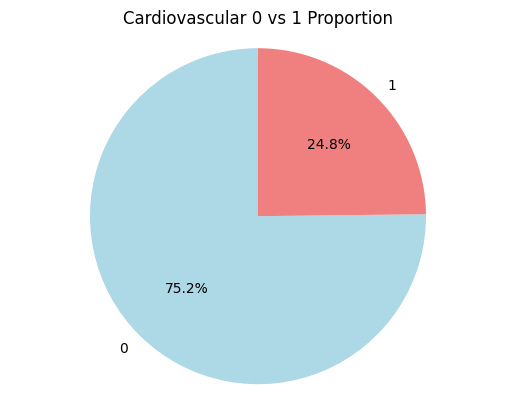

In [270]:
counts = train_data['Cardiovascular'].value_counts()

# 画饼图
plt.pie(counts, labels=['0', '1'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Cardiovascular 0 vs 1 Proportion')
plt.axis('equal') 
plt.show()